# Kaggle heart failure prediction dataset practice

This dataset is an expanded version of the commonly used Cleveland dataset found on the UCI machine learning repository website. [The dataset can be found here.](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Attribute Information:

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


# Import dataset, preview, clean

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dislpay full column widths and all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
cv_df = pd.read_csv('/path/to/heart.csv')

In [4]:
cv_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
cv_df.shape

(918, 12)

In [6]:
cv_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
cv_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
# see if there are any missing values
cv_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Although this dataset is already well made, we should still check each attribute to ensure all the values make sense. We can start this by doing value counts for each attribute.

In [9]:
cv_df['Age'].value_counts()

54    51
58    42
55    41
57    38
56    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
43    24
46    24
41    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
32     5
71     5
72     4
75     3
29     3
76     2
77     2
33     2
31     2
73     1
30     1
28     1
Name: Age, dtype: int64

None of the ages are zero or unreasonably high, so this column looks fine.

In [10]:
cv_df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

There are no missing values. The dataset seems to be skewed pretty heavily towards males, and it would be ideal to have a more even split for better prediction come model training.

In [11]:
cv_df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

There are 4 chest pain types and no missing values, as expected. 

In [12]:
cv_df['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
160     50
125     29
135     20
115     19
145     18
128     18
132     17
138     17
100     15
112     14
170     14
136     13
124     12
180     12
122     12
134     11
142     11
118     10
105      9
144      8
155      8
108      7
126      7
152      7
95       6
133      6
139      5
137      5
146      4
158      4
200      4
131      4
154      3
106      3
178      3
141      3
102      3
104      3
172      2
156      2
148      2
94       2
165      2
114      2
143      2
116      2
123      2
190      2
185      1
174      1
192      1
92       1
80       1
164      1
96       1
98       1
101      1
113      1
117      1
127      1
129      1
0        1
Name: RestingBP, dtype: int64

One of the resting blood pressures is 0, which doesn't make sense, so we will want to drop that column.

In [13]:
# get the index of any row where resting bp is 0
noBP = cv_df[cv_df['RestingBP'] == 0].index

# create new dataset so we don't alter the initial dataset while we are cleaning it
new_cv_df = cv_df
new_cv_df.drop(noBP, inplace=True)
new_cv_df.shape # first value should be one less than before

(917, 12)

In [14]:
cv_df['Cholesterol'].value_counts()

0      171
254     11
223     10
220     10
211      9
230      9
204      9
216      9
263      8
240      8
246      8
219      8
260      8
213      7
214      7
208      7
203      7
234      7
197      7
195      7
243      7
258      7
225      7
282      7
275      7
186      6
236      6
193      6
269      6
196      6
198      6
233      6
201      6
288      6
289      6
207      6
212      6
215      6
218      6
308      6
222      6
224      6
237      6
270      6
274      6
226      6
160      6
245      6
248      6
177      6
264      6
182      5
295      5
228      5
209      5
277      5
273      5
256      5
231      5
250      5
249      5
283      5
235      5
221      5
267      5
268      5
298      5
266      4
305      4
265      4
309      4
227      4
303      4
241      4
297      4
271      4
294      4
292      4
284      4
244      4
238      4
239      4
276      4
229      4
253      4
217      4
192      4
210      4
175      4
184      4
188      4

So 171 data points have a cholesterol of 0, likely meaning it wasn't recorded. That's a sizeable number of data points so dropping them wouldn't be practical. So instead we will replace them with the mean cholesterol from the dataset.

In [15]:
new_cv_df['Cholesterol'].replace(0, new_cv_df['Cholesterol'].mean(axis=0), inplace=True)

In [16]:
new_cv_df['Cholesterol'].value_counts()

199.016358    171
254.000000     11
223.000000     10
220.000000     10
216.000000      9
230.000000      9
204.000000      9
211.000000      9
246.000000      8
219.000000      8
240.000000      8
263.000000      8
260.000000      8
195.000000      7
225.000000      7
282.000000      7
197.000000      7
243.000000      7
214.000000      7
234.000000      7
275.000000      7
203.000000      7
208.000000      7
258.000000      7
213.000000      7
193.000000      6
248.000000      6
201.000000      6
224.000000      6
177.000000      6
288.000000      6
270.000000      6
237.000000      6
212.000000      6
215.000000      6
236.000000      6
269.000000      6
233.000000      6
222.000000      6
226.000000      6
274.000000      6
308.000000      6
218.000000      6
245.000000      6
198.000000      6
196.000000      6
264.000000      6
186.000000      6
207.000000      6
160.000000      6
289.000000      6
267.000000      5
182.000000      5
268.000000      5
250.000000      5
209.000000

In [17]:
cv_df['FastingBS'].value_counts()

0    703
1    214
Name: FastingBS, dtype: int64

Only 0 or 1, as expected. Nothing missing.

In [18]:
cv_df['RestingECG'].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

Nothing missing and only 3 values as expected.

In [19]:
cv_df['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
110    23
125    21
122    20
170    20
115    16
135    15
128    14
138    14
142    14
100    14
145    14
112    13
155    13
144    13
162    13
126    12
154    12
118    12
105    11
152    11
132    11
148    11
165    11
175    10
180    10
172    10
156    10
163    10
143    10
116     9
124     9
98      9
168     8
127     8
158     8
108     8
161     7
174     7
99      7
137     7
131     7
157     7
96      7
173     7
123     7
149     6
139     6
146     6
169     6
141     6
136     6
134     6
179     6
92      6
117     6
114     6
178     6
182     6
133     5
106     5
151     5
147     5
159     5
166     5
109     5
111     5
113     5
119     5
121     5
153     5
171     4
164     4
185     4
86      4
184     4
129     4
94      4
102     4
103     4
90      3
97      3
84      3
82      3
188     2
176     2
190     2
181     2
72      2
93      2
167     2
88      2
186     2
80      2
95      2
104     2


No heart rates of 0 or anything that looks out of place.

In [20]:
cv_df['ExerciseAngina'].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

Only yes or no, no missing values.

In [21]:
cv_df['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     52
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.3      7
 2.6      7
 1.1      7
 1.9      7
 1.7      6
 2.2      5
 0.9      4
 3.6      4
 2.4      4
 3.4      3
 2.1      2
-0.1      2
 4.2      2
 3.2      2
 3.5      2
-0.5      2
 2.3      2
-1.0      2
 2.9      1
 3.8      1
-0.9      1
-2.6      1
-1.5      1
 3.7      1
 5.0      1
-2.0      1
-0.8      1
 3.1      1
 4.4      1
 5.6      1
 6.2      1
-0.7      1
-1.1      1
Name: Oldpeak, dtype: int64

No missing values.

In [22]:
cv_df['ST_Slope'].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

As expected.

In [23]:
cv_df['HeartDisease'].value_counts()

1    507
0    410
Name: HeartDisease, dtype: int64

No missing values, only two categories as expected.

The dataset seems to be well cleaned at this point. Let's move on to visualizing it.

# Visualize the data

In [24]:
# rename to original name
cv_df = new_cv_df

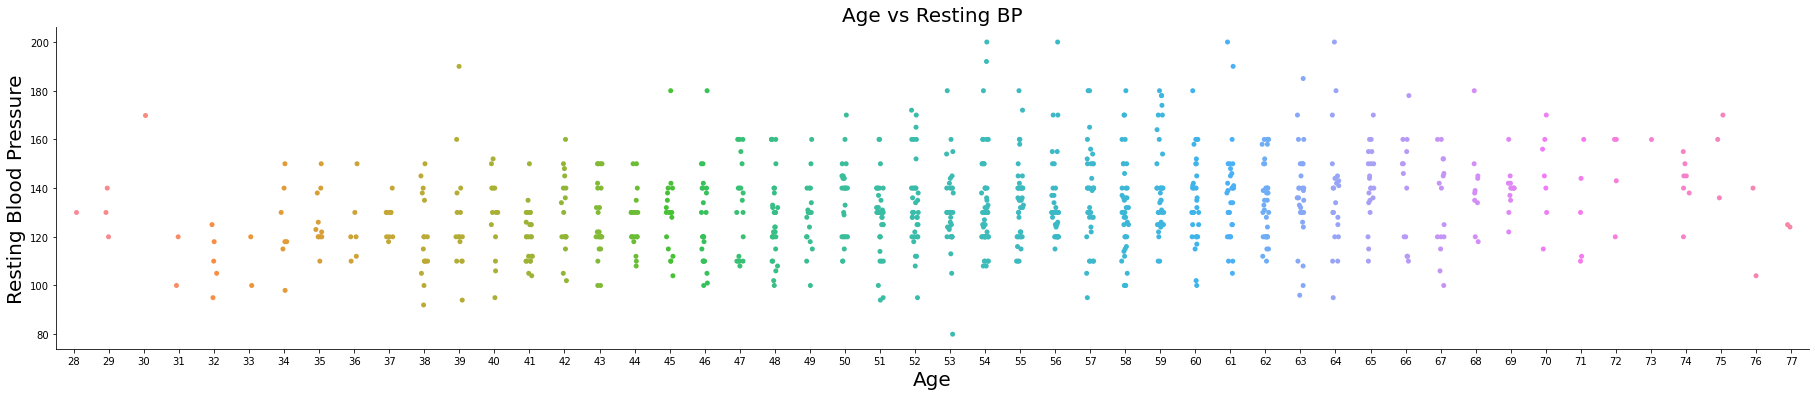

In [25]:
sns.catplot(x='Age', y='RestingBP', data=cv_df, aspect=5) 
plt.ylabel('Resting Blood Pressure', fontsize=20) 
plt.xlabel('Age', fontsize=20) 
plt.title('Age vs Resting BP', fontsize=20)
plt.show()

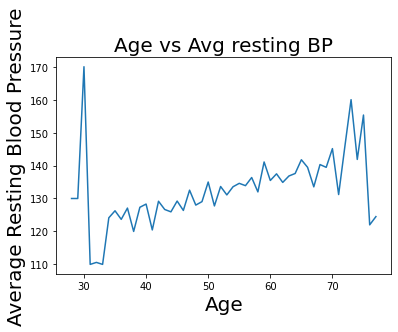

In [26]:
age_restbp_group = cv_df.groupby(['Age']).mean('RestingBP').reset_index()
sns.lineplot(x='Age', y='RestingBP', data=age_restbp_group)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Average Resting Blood Pressure', fontsize=20)
plt.title('Age vs Avg resting BP', fontsize=20)
plt.show()

Only one data point for age 30, and it's high. While the average for 31 is low so it looks jagged. But there is a clear upward trend in average resting blood pressue as age increases. 

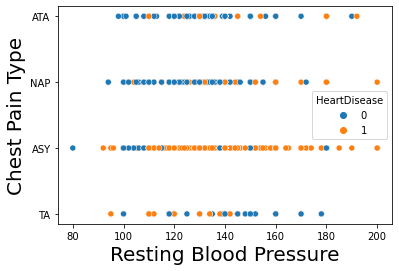

In [27]:
sns.scatterplot(x='RestingBP', y='ChestPainType', hue='HeartDisease', data=cv_df)
plt.xlabel('Resting Blood Pressure', fontsize=20)
plt.ylabel('Chest Pain Type', fontsize=20)
plt.show()

TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

A lot of people who are asymptomatic have heart disease. Chest pain on its own is probably not a great predictor of heart disease.

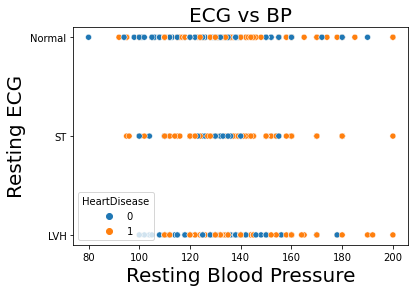

In [28]:
sns.scatterplot(x='RestingBP', y='RestingECG', hue='HeartDisease', data=cv_df)
plt.xlabel('Resting Blood Pressure', fontsize=20)
plt.ylabel('Resting ECG', fontsize=20)
plt.title('ECG vs BP', fontsize=20)
plt.show()

Probably too many data points to be able to glean anything from this.

# Transform and preprocess dataset

Some of the attritbutes use categorical variables, which we will need to convert to numerical for model training.

We will use one-hot encoding to convert to numerical.

In [29]:
# one-hot encoding of sex
dummy1 = pd.get_dummies(cv_df['Sex'])
dummy1.head()

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [30]:
cv_df = pd.concat([cv_df, dummy1], axis=1).drop('Sex', axis=1)
cv_df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283.0,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,0,1


In [31]:
# one-hot encoding of chest pain type
dummy2 = pd.get_dummies(cv_df['ChestPainType'])
dummy2.head()

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [32]:
cv_df = pd.concat([cv_df, dummy2], axis=1).drop('ChestPainType', axis=1)
cv_df.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA
0,40,140,289.0,0,Normal,172,N,0.0,Up,0,0,1,0,1,0,0
1,49,160,180.0,0,Normal,156,N,1.0,Flat,1,1,0,0,0,1,0
2,37,130,283.0,0,ST,98,N,0.0,Up,0,0,1,0,1,0,0
3,48,138,214.0,0,Normal,108,Y,1.5,Flat,1,1,0,1,0,0,0
4,54,150,195.0,0,Normal,122,N,0.0,Up,0,0,1,0,0,1,0


In [33]:
dummy3 = pd.get_dummies(cv_df['RestingECG'])
dummy3.head()

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [34]:
cv_df = pd.concat([cv_df, dummy3], axis=1).drop('RestingECG', axis=1)
cv_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST
0,40,140,289.0,0,172,N,0.0,Up,0,0,1,0,1,0,0,0,1,0
1,49,160,180.0,0,156,N,1.0,Flat,1,1,0,0,0,1,0,0,1,0
2,37,130,283.0,0,98,N,0.0,Up,0,0,1,0,1,0,0,0,0,1
3,48,138,214.0,0,108,Y,1.5,Flat,1,1,0,1,0,0,0,0,1,0
4,54,150,195.0,0,122,N,0.0,Up,0,0,1,0,0,1,0,0,1,0


In [35]:
dummy4 = pd.get_dummies(cv_df['ExerciseAngina'])
dummy4.head()

,N,Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [36]:
cv_df = pd.concat([cv_df, dummy4], axis=1).drop('ExerciseAngina', axis=1)
cv_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y
0,40,140,289.0,0,172,0.0,Up,0,0,1,0,1,0,0,0,1,0,1,0
1,49,160,180.0,0,156,1.0,Flat,1,1,0,0,0,1,0,0,1,0,1,0
2,37,130,283.0,0,98,0.0,Up,0,0,1,0,1,0,0,0,0,1,1,0
3,48,138,214.0,0,108,1.5,Flat,1,1,0,1,0,0,0,0,1,0,0,1
4,54,150,195.0,0,122,0.0,Up,0,0,1,0,0,1,0,0,1,0,1,0


In [37]:
dummy5 = pd.get_dummies(cv_df['ST_Slope'])
dummy5.head()

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [38]:
cv_df = pd.concat([cv_df, dummy5], axis=1).drop('ST_Slope', axis=1)
cv_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289.0,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214.0,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195.0,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


All of the categorical variables are now one-hot encoded as numerical values. Let's check the datatypes and make sure there are no objects now.

In [39]:
cv_df.dtypes

Age               int64
RestingBP         int64
Cholesterol     float64
FastingBS         int64
MaxHR             int64
Oldpeak         float64
HeartDisease      int64
F                 uint8
M                 uint8
ASY               uint8
ATA               uint8
NAP               uint8
TA                uint8
LVH               uint8
Normal            uint8
ST                uint8
N                 uint8
Y                 uint8
Down              uint8
Flat              uint8
Up                uint8
dtype: object

In [40]:
# we'll create a copy of the processed dataset
proc_df = cv_df

In [41]:
# check for missing values
proc_df.isnull().sum()

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
F               0
M               0
ASY             0
ATA             0
NAP             0
TA              0
LVH             0
Normal          0
ST              0
N               0
Y               0
Down            0
Flat            0
Up              0
dtype: int64

The dataset is now prepared for model training. We will export it as a .csv here so we can easily load the processed data into a new notebook to try different model types.

In [51]:
proc_df.to_csv('/path/to/heart_processed.csv', index=False)